# Data Loading and Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import spacy
import re
from collections import Counter

In [3]:
# Load the dataset
df = pd.read_csv("UpdatedResumeDataSet.csv")
print(df.head())
print("\nCategory Distribution:\n", df['Category'].value_counts())

       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...

Category Distribution:
 Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineeri

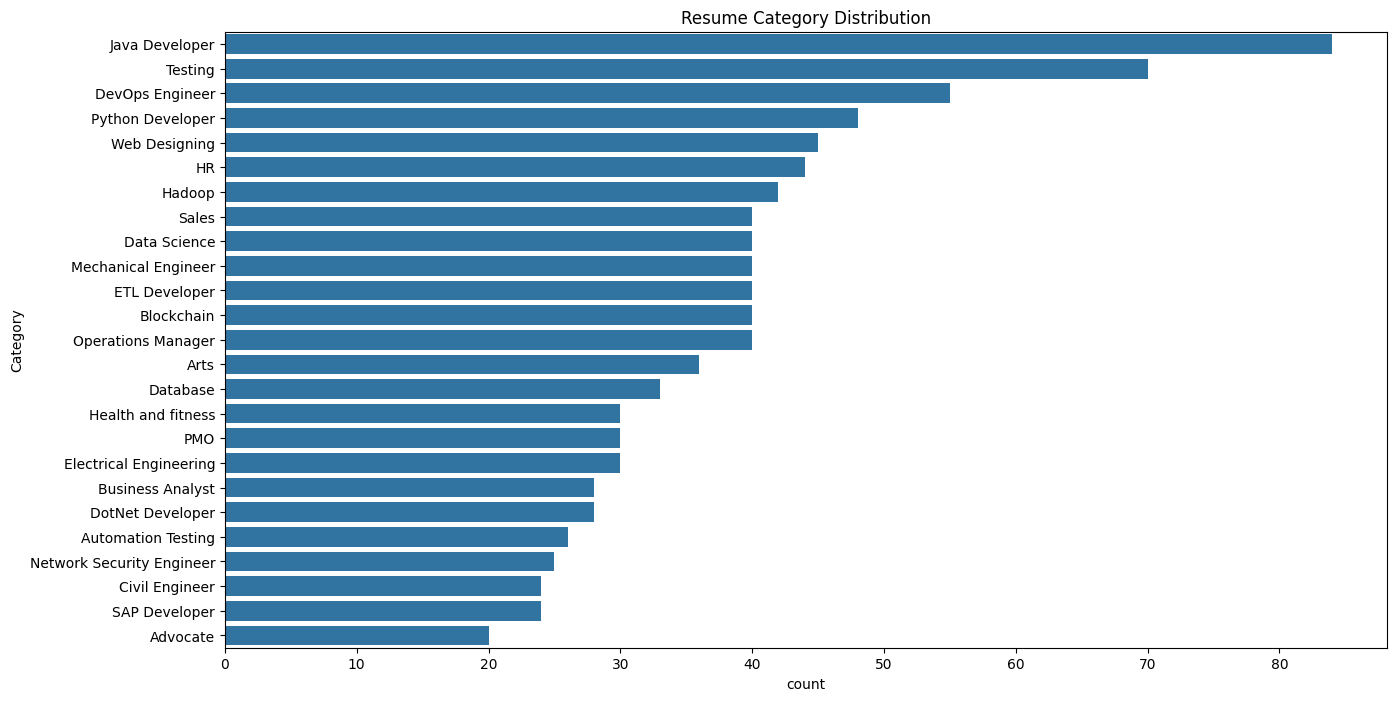

In [4]:
# Visualize category distribution
plt.figure(figsize=(15,8))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Resume Category Distribution')
plt.show()

# Data Preprocessing

In [33]:
# Clean resume text
def clean_resume(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)
    # Remove social media tags/RT/cc
    text = re.sub(r'RT|cc', ' ', text, flags=re.IGNORECASE)
    text = re.sub(r'#\S+', ' ', text)
    text = re.sub(r'@\S+', ' ', text)
    # Remove special characters (keeping basic punctuation)
    text = re.sub(r'[{}]'.format(re.escape(r"""!"#$%&'()*+,/:;<=>?@[\]^_`{|}~""")), ' ', text)
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7f]', ' ', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()    
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    # text = re.sub(r'\d+', '', text)
    return text
    
df['cleaned_resume'] = df['Resume'].apply(clean_resume)

# Encode categories
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['Category'])

In [34]:
clean_resume(df['Resume'][0])

'skills programming languages python pandas numpy scipy scikit-learn matplotlib sql java javascript jquery. machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets. database visualizations mysql sqlserver cassandra hbase elasticsearch d3.js dc.js plotly kibana matplotlib ggplot tableau. others regular expression html css angular 6 logstash kafka python flask git docker computer vision - open cv and understanding of deep learning.education details data science assurance associate data science assurance associate - ernst young llp skill details javascript- exprience - 24 months jquery- exprience - 24 months python- exprience - 24 monthscompany details company - ernst young llp description - fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists

In [35]:
df.sample(10)

,Category,Resume,cleaned_resume,category_encoded
528,Operations Manager,KEY COMPETENCIES â¶Multi - Operations Managem...,key competencies multi - operations management...,18
655,Network Security Engineer,Skill Set â¢â¢Cisco Certified Network Associ...,skill set cisco ce ified network associates na...,17
904,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge ms-power po...,23
277,Health and fitness,Education Details \r\nJanuary 1992 to January ...,education details january 1992 to january 2003...,14
397,Java Developer,"Operating Systems Windows XP, 7, 10. Tools/Pac...",operating systems windows xp 7 10. tools packa...,15
215,Mechanical Engineer,Education Details \r\nMay 1999 to September 20...,education details may 1999 to september 2002 d...,16
812,ETL Developer,SKILL SET â Talend Big Data â Informatica ...,skill set talend big data informatica power ce...,10
866,Blockchain,"SKILLS Bitcoin, Ethereum Solidity Hyperledger,...",skills bitcoin ethereum solidity hyperledger b...,3
741,Database,"TECHNICAL SKILLS â¢ SQL â¢ Oracle v10, v11, ...",technical skills sql oracle v10 v11 v12 r prog...,7
26,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skills python tableau data visualization r stu...,6


# Feature Extraction (TF-IDF)

In [36]:
tfidf = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1,2),
    max_features=5000
)

X = tfidf.fit_transform(df['cleaned_resume'])
y = df['category_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print("Dataset size " ,df.shape)
print("Test labels size (y_train):", y_train.shape)
print("Test labels size (y_test):", y_test.shape)
print("Train features size (X_train):", X_train.shape)
print("Test features size (X_test):", X_test.shape)

Dataset size  (962, 4)
Test labels size (y_train): (769,)
Test labels size (y_test): (193,)
Train features size (X_train): (769, 5000)
Test features size (X_test): (193, 5000)


#  Model Training (Job Prediction)

In [38]:
# Initialize models
models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel='linear')
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)      # Train model
    y_pred = model.predict(X_test)   # Predict on test set
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("Accuracy:", accuracy_score(y_test, y_pred))

# Select best model (Random Forest here)
final_model = RandomForestClassifier(n_estimators=100)
final_model.fit(X_train, y_train)


Naive Bayes Performance:
                           precision    recall  f1-score   support

                 Advocate       1.00      0.33      0.50         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.0

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# ATS Score Calculation

In [39]:
def calculate_ats_score(resume_text, job_description=""):
    score = 0
    
    # Keyword matching (can be customized per job category)
    keywords = {
        'skills': 3,
        'experience': 2,
        'education': 2,
        'project': 2,
        'certification': 1,
        'achievement': 1
    }
    
    # Formatting points
    if len(resume_text.split('\n')) > 10:  # Has sections
        score += 10
    if any(char.isdigit() for char in resume_text):  # Contains numbers (dates, stats)
        score += 5
    
    # Keyword points
    for word, weight in keywords.items():
        if word in resume_text.lower():
            score += weight * resume_text.lower().count(word)
    
    # Normalize to 0-100 scale
    score = min(100, score * 1.5)  # Adjust scaling factor as needed
    
    return round(score)

# Example usage
df['ats_score'] = df['Resume'].apply(calculate_ats_score)

In [40]:
df.sample(10)

,Category,Resume,cleaned_resume,category_encoded,ats_score
104,Arts,â¢ Good communication skill â¢ Quick learner...,good communication skill quick learner keen to...,1,42
225,Sales,Education Details \r\n Bachelor's \r\n Bache...,education details bachelor s bachelor s commer...,22,26
824,DotNet Developer,TECHNICAL SKILLS â¢ Web Technologies: ASP .NE...,technical skills web technologies asp .net htm...,9,30
286,Health and fitness,SKILLS: Computer: â¢ Can easily operate in Op...,skills computer can easily operate in operatin...,14,33
136,Arts,"Additional qualifications April 2000, Web Desi...",additional qualifications april 2000 web desig...,1,75
50,HR,SOFTWARE SKILLS: â¢ General Computer Proficie...,software skills general computer proficiency p...,12,39
550,Operations Manager,Education Details \r\nAugust 2000 B.E Electron...,education details august 2000 b.e electronics ...,18,100
728,Database,"Areas of Expertise â¢ Oracle Databases 12c, 1...",areas of expe ise oracle databases 12c 11g 10g...,7,32
175,Web Designing,"Technical Skills Web Technologies: Angular JS,...",technical skills web technologies angular js h...,24,66
681,PMO,Skills Exceptional communication and networkin...,skills exceptional communication and networkin...,19,50


# Key Information Extraction

In [42]:
nlp = spacy.load('en_core_web_sm')

def extract_key_info(resume_text):
    doc = nlp(resume_text)    # Process text with spaCy
    
    # Extract entities
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    
    # Extract skills 
    skills = []
    for token in doc:
        if token.pos_ == 'NOUN' and len(token.text) > 3:
            skills.append(token.text.lower())
    
    # Count skill frequency
    skill_counts = Counter(skills)
    top_skills = [skill for skill, count in skill_counts.most_common(5)]
    
    # Extract education
    education = []
    for ent in doc.ents:
        if ent.label_ == 'ORG' and ('university' in ent.text.lower() or 
                                   'college' in ent.text.lower() or 
                                   'institute' in ent.text.lower()):
            education.append(ent.text)
    
    return {
        'entities': entities,
        'top_skills': top_skills,
        'education': list(set(education))[:3]  # Get unique entries
    }

# Apply to all resumes
df['key_info'] = df['Resume'].apply(extract_key_info)

In [43]:
df.sample(10)

,Category,Resume,cleaned_resume,category_encoded,ats_score,key_info
585,Python Developer,Training attended: 1. Successfully completed E...,training attended 1. su essfully completed esd...,20,33,"{'entities': [('1', 'CARDINAL'), ('ESD', 'ORG'..."
39,Data Science,Expertise â Data and Quantitative Analysis â...,expe ise data and quantitative analysis decisi...,6,44,{'entities': [('Data and Quantitative Analysis...
461,Automation Testing,TECHNICAL SKILLS Languages: Core Java Automati...,technical skills languages core java automatio...,2,30,{'entities': [('TECHNICAL SKILLS Languages: Co...
745,Hadoop,Areas of expertise â¢ Big Data Ecosystems: Ha...,areas of expe ise big data ecosystems hadoop-h...,13,40,"{'entities': [('Big Data Ecosystems', 'ORG'), ..."
47,HR,KEY SKILLS: â¢ Computerized accounting with t...,key skills computerized a ounting with tally s...,12,34,"{'entities': [('KEY', 'ORG'), ('Computerized',..."
247,Sales,KEY SKILLS: â¢ Planning & Strategizing â¢ Pr...,key skills planning strategizing presentation ...,22,48,"{'entities': [('KEY', 'ORG'), ('Planning & Str..."
84,Advocate,"TECHNICAL QUALIFICATIONS: â¢ Windows, Ms. Off...",technical qualifications windows ms. officeedu...,0,28,"{'entities': [('Windows', 'LOC'), ('OfficeEduc..."
866,Blockchain,"SKILLS Bitcoin, Ethereum Solidity Hyperledger,...",skills bitcoin ethereum solidity hyperledger b...,3,30,"{'entities': [('SKILLS Bitcoin', 'ORG'), ('Beg..."
423,Business Analyst,Key Skills - Requirement Gathering - Requireme...,key skills - requirement gathering - requireme...,4,64,{'entities': [('Key Skills - Requirement Gathe...
951,Testing,â Willingness to accept the challenges. â ...,willingness to a ept the challenges. positive ...,23,28,"{'entities': [('Team Player', 'ORG'), ('Dongar..."


In [45]:
df['key_info'][0]

{'entities': [('matplotlib', 'PERSON'),
  ('Sql', 'PERSON'),
  ('Java', 'PERSON'),
  ('Bayes', 'ORG'),
  ('KNN', 'ORG'),
  ('Random Forest', 'ORG'),
  ('Cluster Analysis', 'ORG'),
  ('Topic Modelling', 'WORK_OF_ART'),
  ('PCA & Neural Nets', 'ORG'),
  ('SqlServer', 'GPE'),
  ('Cassandra', 'GPE'),
  ('DC.js', 'GPE'),
  ('kibana', 'PERSON'),
  ('matplotlib', 'PERSON'),
  ('Tableau', 'GPE'),
  ('HTML', 'ORG'),
  ('CSS', 'ORG'),
  ('6', 'CARDINAL'),
  ('Logstash', 'GPE'),
  ('Kafka', 'PERSON'),
  ('Git, Docker', 'ORG'),
  ('Deep', 'NORP'),
  ('Skill Details', 'PERSON'),
  ('24 months', 'DATE'),
  ('Exprience', 'GPE'),
  ('24 months', 'DATE'),
  ('Exprience', 'GPE'),
  ('24', 'CARDINAL'),
  ('description - Fraud Investigations', 'PERSON'),
  ('REVIEW', 'ORG'),
  ('Tools & Technologies: Python', 'ORG'),
  ('Bayes', 'ORG'),
  ('Vader', 'PERSON'),
  ('Tableau', 'GPE'),
  ('MULTIPLE DATA SCIENCE AND ANALYTIC PROJECTS (USA CLIENTS', 'ORG'),
  ('TEXT ANALYTICS - MOTOR VEHICLE CUSTOMER REVIEW DATA

# Prediction Pipeline
 

In [47]:
def analyze_resume(resume_text):
    # Clean text
    cleaned_text = clean_resume(resume_text)
    
    # Transform using TF-IDF
    features = tfidf.transform([cleaned_text])
    
    # Predict category
    category_num = final_model.predict(features)[0]
    category = label_encoder.inverse_transform([category_num])[0]
    
    # Calculate ATS score
    ats_score = calculate_ats_score(resume_text)
    
    # Extract key information
    key_info = extract_key_info(resume_text)
    
    return {
        'predicted_category': category,
        'ats_score': ats_score,
        'key_information': key_info
    }

# Example usage
sample_resume = """John Doe
Senior Java Developer

SKILLS:
Java, Spring Boot, Hibernate, Microservices, AWS

EXPERIENCE:
- Senior Developer at Tech Solutions (2018-Present)
- Developed microservices architecture
- Improved system performance by 40%

EDUCATION:
MS in Computer Science, Stanford University
"""
# sample_resume = """
# AREASOFINTEREST
#  oDeepLearning oMachineLearning oImageProcessing oComputerVision oStatisticalDataAnalysis oGIS
#  SCHOLASTICACHIEVEMENTS
#  •Achieved98.81percentileinGATECivilEngineeringamong0.15million+candidates [2018]
#  •Secured98.9percentileinJEEMainamong1.3million+candidates [2014]
#  •Receivedanhonorableacknowledgement forcontributioninresearchabout theapplicationof remotesensing in
#  watersecurityandagricultureforfoodsecurity supportedbyTheNationalScienceFoundation,USA[2020]
#  •Honouredwithappreciationletter fromformerMHRDministerSmriti Irani&AwardeeofCSSS(Central
#  SectorScholarshipScheme)worth50krupeesforbeingamongtop0.1percentinCBSEBoardexam [2014]
#  •CentumholderinsubjectMATHEMATICSinCBSEBoardExamination2014 [2020]
#  •Awarded3kcashprizeforsecuringAIR28&3rdinChennairegioninJuniorMathematicsOlympiad [2012]
#  •Achieved100%scholarshipworth1.6LakhrupeesinANTHEExamconductedbyAAKASHInstitute [2012]
#  MAJORPROJECTS
#  •M.TechProject: Incremental learningforlanduse-landcoverclassi cation [July20-Present]
#  Guide:Prof.BiplabBanerjee
#  oPerformedsemanticsegmentationonUCMercedandAIDdatasetsusingU-netArchitecture
#  oDevelopinganimprovedmodelusingattentionU-netforEndtoEndIncremental learningtoaddnewclasses
#  oImplementingGANbasedGenerativeFeatureReplaywithFeaturedistillationtoavoidCatastrophicforgetting
#  •Real-TimeHandGestureTrackingUsingDeepLearning [April20-June20]
#  SummerofScience2020
#  oDesignedamodelusingOpenCVtodetecthandgesturesusingbasicmathematicalandgeometricalconcepts
#  oDevelopedaCNNmodelwithTensorFlowusingleapGestRecogdatasetandachievedanaccuracyof95%
#  oFine-tunedVGG-16modelusingTransferLearningconcepttoachieve99%detectionaccuracy
#  •Show,AttendandTell forImagetospeech [Aug20-Present]
#  Guide:Prof.BiplabBanerjee
#  oImplementedShow,AttendandtellapproachusingInceptionV3+Encoder-Decoderarchitecture
#  oOutputthegeneratedcaptioninspeechformtogivethecontextofthesceneusingGoogletexttospeechengine
#  oDevelopingaVisualquestionansweringSystemusingtheinput imageforAttention-basedquerying
#  •M.TechSeminar:Context-awareCNNforObjectDetection [Feb20-June20]
#  Guide:Guide-Prof.B.K.Mohan
#  oPerformedextensiveliteraturestudyondi erentObjectdetectionalgorithmsforsatelliteimages
#  oAchievedimprovedperformanceinContext-awareCNNoverRCNN,Fast-RCNNandFaster-RCNN
#  oUtilizedContextROIMiningLayeroverFasterR-CNNArchitecturetoachieveenhanceddetectionaccuracy
#  •B.TechProject:AccessibilityAnalysisofPrimarySchoolsUsingGeo-spatialTechniques
#  Guide:Prof.NishaRadhakrishnan [Jan18-May18]
#  oConductedanextensive eldsurveyfromstudentsof144governmentprimaryschoolsacrossTrichydistrict
#  oCalculatedSpatialAccessibilityIndexusingArcGIS&Three-step oatingcatchmentareamodel
#  oGeneratedSPAIThematicmapofschoolstoidentifytheareasdeprivedofprimaryeducational facilities
#  Abhishek Kumar Ranjan
#  Geoinformatics and Natural Resources Engineering
#  Indian Institute of Technology, Bombay
#  193310005
#  M.Tech.
#  Gender: Male
#  DOB:  18-07-1996
#  Examination University Institute Year CPI / %
#  Post Graduation
#  Graduation
#  Graduation Specialization: Civil Engineering
#  Intermediate
#  Matriculation
#  IIT Bombay
#  NIT Trichy
 
# CBSE
#  CBSE
#  IIT Bombay
#  NIT Trichy
 
# K.V. NO-1 A.F.S. Tambaram
#  K.V. NO-1 A.F.S. Tambaram
#  2021
#  2018
#  2014
#  2012
#  9.5
#  8.18
#  95.40%
#  9.8
# COURSE PROJECTS
#  • One-shot learning for Human face mask detection for COVID-19
#  [July20-Aug20]
#  o Simpli ed the problem statement as a Binary Classi cation problem and identi ed anchor pairs
#  o Reduced training time signi cantly by deploying Siamese Network & achieved accuracy of 77% with triplet loss
#  • Gold Prospectivity using fuzzy logic and Arti cial Neural network
#  [Feb20-May20]
#  o Generated prospectively maps of gold reserve of Arunta region from its geochemical properties in ArcMap
#  o Predicted optimum location of gold deposits with an accuracy of 75% using Arti cial Neural Network
#  o Generated gold prospectivity map using Fuzzy Inference System in ArcGIS & obtained accuracy of 80%
#  • DNA sequence classi er using machine learning
#  [Feb20-May20]
#  o Developed Multinomial Naive Bayes classi er from scratch using Bag-of-words language model
#  o Achieved genome accuracy of 98.4% on human, 99.35% on chimpanzee and 92.56% on dog datasets
#  • Flight Delay Prediction on Bureau of Transportation Statistics Data using Julia
#  [Mar20-Apr20]
#  o Analyzed underlying trends in Flight delay based on visualization & EDA (Exploratory Data Analysis)
#  o Increased overall accuracy by 2.16% by performing feature engineering to 90.68% using Logistic Regression
#  • Statistical analysis of CWC streamow Time series data over Ganga Basin
#  [July19-Apr20]
#  o Preprocessed and formatted Time series data of over 45+ years and 20+ gauge stations in desired structure
#  o Utilized MATLAB & Numpy, Pandas, Matplotlib libraries of python for analysis, visualization of data
#  • House pricing prediction using Linear/Non-linear and Regularized Regression
#  [Jan 20Feb20]
#  o Implemented Linear, Polynomial , Ridge and LASSO Regression model and compared their performance
#  o Achieved maximum R-square score of 0.5392 and minimum RMSE with LASSO regression in Julia
#  • Detection of Line features in images using Hough Transform
#  o Implemented feature extraction technique of Hough Transform from scratch using Matlab over Sobel detected edge
#  o Achieved comparable result with inbuilt function and developed a Graphics User Interface for this operation
#  [Aug19-Nov19]
#  • Edge Detection package for Satellite images
#  [Feb20-May20]
#  o Implemented Canny Edge Detector from scratch in MATLAB and achieved similar result as inbuilt function
#  o Registered improvement over Sobel operator using NMS, Double threshold, Edge Tracking by Hysteresis
#  • Deploying Solar Panel in IIT Bombay using GIS techniques
#  [Aug19-Nov19]
#  o Interpolated Irradiance surface using IDW of IITB campus using Solar DATA from PVGIS Database
#  o Conducted cost-bene t analysis of solar data in di erent PV Systems to achieve optimum PV system
#  o Developed 3-D model in AUTOCAD of IITB campus, simulating the deployment of SOLAR grid
#  POSITIONS OF RESPONSIBILITY
#  • Teaching Assistant-CSRE, IIT Bombay
#  [July20-Present]
#  o Assisting in instructing a niche group of 113+ students by holding tutorials and helping with project realization
#  • Department Coordinator CSRE ISCP 2020-21
#  [May20-Present]
#  o Worked in a team of 177 people and coordinated the e-orientation at the department level for 30 new entrants
#  o Interviewed candidates to select a team of SCs & leading them to mentor 31 students throughout the year
#  o Compiled & Developed departments Handbook with SCs that serves as informative manual to PG freshmen
#  o Mentoring 8 students throughout the year helping them on academic as well as non-academic fronts
#  • Volunteer for helping students from TEQIP-III institutions prepare for GATE Exam [Aug20-Present]
#  o To help the UG students from TEQIP-III Institutions in Bihar, learn fundamental concepts & prepare for GATE
#  o Toencourage students to appear for GATE and make themaware of di erent opportunities after GATE quali cation
#  KEY RELEVANT COURSES
#  • Machine Learning for Remote Sensing II(Transfer learning,R-CNN family,YOLO )*
#  • Machine Learning for Remote Sensing I (Linear Regression,Decision Trees,KNN,SVM )
#  • Advanced Methods in Satellite Image Processing(Image classi cation, change detection, lters)
#  • Principles of Geographic Information System(GIS applications,Spatial data ,Interpolation)
#  • Geo-spatial Predictive Modelling( Neuro-fuzzy inference system,SVM,Neural Nets, CNN,SVM)*
#  *audit
#  TECHNICAL SKILLS
#  • Programming Languages : Python, R, SQL, MATLAB, C++, C, Julia
#  • Libraries/Frameworks : Keras, Scikit-Learn, PyTorch, TensorFlow,
#  • Software : ESRI ArcGIS Desktop, QGIS, ERDAS Imagine, ENVI, LATEX, Git
#  Scholastic achievements and extracurricular activities are not verified by the Placement Cell
# """


result = analyze_resume(sample_resume)
print("\nAnalysis Results:")
for key, value in result.items():
    print(f"{key}: {value}")


Analysis Results:
predicted_category: Java Developer
ats_score: 33
key_information: {'entities': [('John Doe', 'PERSON'), ('Java Developer', 'PERSON'), ('Java', 'PERSON'), ('Spring Boot', 'PERSON'), ('Hibernate', 'PERSON'), ('2018', 'DATE'), ('40%', 'PERCENT'), ('Stanford University', 'ORG')], 'top_skills': ['developer', 'microservices', 'architecture', 'system', 'performance'], 'education': ['Stanford University']}


# Step 8: Deployment Recommendations

In [48]:
import joblib
from sklearn.pipeline import Pipeline

# Create a pipeline with your TF-IDF and model
pipeline = Pipeline([
    ('tfidf', tfidf),
    ('classifier', final_model)
])

# Save all necessary components
joblib.dump(pipeline, 'resume_pipeline.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']